# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/ml-mipt/ml-mipt/basic_s20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)

(846, 19) (846,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,39,81,45,68,169,73,6,151,44,19,146,173,336,186,75,7,0,183,189
1,729,103,48,96,232,71,10,205,32,23,153,226,633,197,71,2,15,188,196
2,314,90,42,63,126,55,7,152,45,19,142,173,336,173,81,0,15,180,184
3,780,109,47,96,206,64,9,198,33,23,150,219,586,191,70,4,13,190,198
4,691,86,45,71,170,70,6,146,45,19,146,172,321,189,71,10,8,187,191
5,447,95,57,104,228,74,10,212,31,24,175,224,670,223,74,0,4,186,193
6,324,94,38,88,179,60,7,170,39,21,131,188,435,144,66,2,28,195,204
7,426,106,53,98,203,63,11,220,30,25,167,228,710,214,71,10,24,188,197
8,17,99,41,77,197,69,6,177,36,21,139,202,485,151,72,4,10,198,199
9,446,101,52,101,197,62,9,188,35,22,162,208,527,203,67,14,15,193,202


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,432.996357,93.593807,44.588342,81.697632,168.384335,61.613843,8.440801,168.102004,40.974499,20.517304,147.336976,187.914390,435.346084,173.721311,72.260474,6.165756,12.387978,188.970856,195.524590
std,244.748590,8.061173,5.993452,15.372967,32.383590,7.335064,3.993454,31.931676,7.560177,2.477300,14.109236,29.531963,169.187724,31.678770,6.689919,4.743016,8.792453,5.976770,7.250587
min,1.000000,73.000000,33.000000,40.000000,111.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,229.000000,88.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.000000,34.000000,19.000000,137.000000,168.000000,319.000000,150.000000,68.000000,2.000000,5.000000,185.000000,191.000000
50%,428.000000,93.000000,44.000000,78.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,145.000000,178.000000,363.000000,173.000000,71.000000,5.000000,11.000000,189.000000,197.000000
75%,646.000000,99.000000,49.000000,96.000000,194.000000,65.000000,10.000000,195.000000,46.000000,22.000000,158.000000,215.000000,573.000000,197.000000,75.000000,9.000000,18.000000,193.000000,201.000000
max,845.000000,119.000000,58.000000,110.000000,322.000000,133.000000,55.000000,261.000000,61.000000,28.000000,182.000000,287.000000,998.000000,268.000000,119.000000,21.000000,41.000000,203.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
from sklearn import preprocessing

*Preprocessing includes filling missing values (not required), converting non-numeric features (not required), scaling features, adding features*

*Will prepare data normalizer for future application.*

In [7]:
normalizer = preprocessing.StandardScaler()

*Will also remove the first feature, because it just represents order (it is unique and won't help us in classification).*

In [42]:
X_train = X_train[:, 1:]
X_test = X_test[:, 1:]

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score
import scikitplot

In [43]:
model_pipeline = Pipeline(
    steps = (
        ('preproc', normalizer),
        ('lr', LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500))
    )
)
param_distr = {
    'lr__C': np.logspace(-5, 5, 11)
}

In [44]:
clf = RandomizedSearchCV(model_pipeline,
                         param_distr,
                         scoring=['f1_weighted', 'accuracy'],
                         cv=5,
                         n_jobs=-1,
                         refit='accuracy')
clf.fit(X_train, y_train)
pd.DataFrame(clf.cv_results_)[['param_lr__C',
                               'mean_test_accuracy',
                               'rank_test_accuracy',
                               'mean_test_f1_weighted',
                               'rank_test_f1_weighted',
                              ]].sort_values('rank_test_accuracy')

,param_lr__C,mean_test_accuracy,rank_test_accuracy,mean_test_f1_weighted,rank_test_f1_weighted
5,100,0.795897,1,0.792571,1
3,100000,0.794062,2,0.790699,2
4,1000,0.794062,2,0.790699,2
6,10000,0.794062,2,0.790699,2
9,1,0.781284,5,0.775296,5
0,0.1,0.759416,6,0.746506,6
1,0.01,0.688390,7,0.669397,7
2,0.001,0.526305,8,0.500835,8
8,0.0001,0.378749,9,0.262810,9
7,1e-05,0.267756,10,0.113120,10


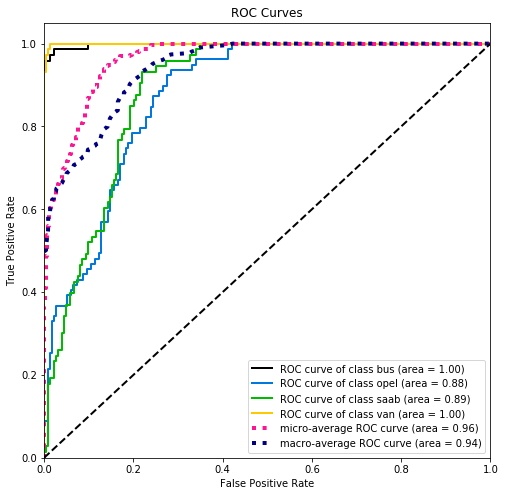

In [45]:
scikitplot.metrics.plot_roc(y_test, clf.predict_proba(X_test), figsize=(8, 8))

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explained variance plot. 

In [46]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [55]:
pca = PCA(n_components=X_train.shape[1])
pca.fit(normalizer.fit_transform(X_train))
loss = np.append(pca.explained_variance_, 0)
for i in range(18, 0, -1):
    loss[i - 1] += loss[i]
loss /= loss[0]

In [56]:
remaining_components = np.arange(0, 19)

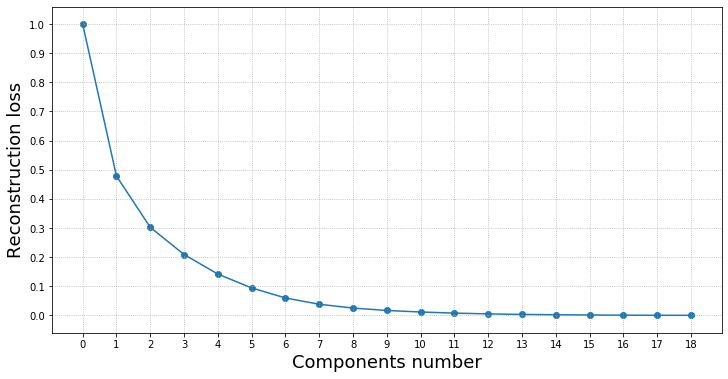

In [81]:
plt.figure(figsize=(12, 6))
plt.scatter(remaining_components, loss)
plt.plot(remaining_components, loss)
plt.xticks(remaining_components)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Components number', fontsize=18)
plt.ylabel('Reconstruction loss', fontsize=18)
plt.grid(ls=':')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [58]:
N_COMPONENTS = 12
pca = PCA(n_components=N_COMPONENTS)

*Before using the PCA approach data ought to be normalized.*<br>
*I decided to leave 12 main features out of 18, because according to the plot this seems to me the best option to exclude features with losing as little information that it won't hurt us anyhow.*

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [82]:
pca_pipeline = Pipeline(
    steps = (
        ('scale', normalizer),
        ('pca', pca),
        ('lr', LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500))
    )
)
param_distr = {
    'lr__C': np.logspace(-5, 5, 11)
}

In [83]:
pca_clf = RandomizedSearchCV(pca_pipeline,
                             param_distr,
                             scoring=['f1_weighted', 'accuracy'],
                             cv=10,
                             n_jobs=-1,
                             refit='accuracy')
pca_clf.fit(X_train, y_train)
pd.DataFrame(pca_clf.cv_results_)[['param_lr__C',
                               'mean_test_accuracy',
                               'rank_test_accuracy',
                               'mean_test_f1_weighted',
                               'rank_test_f1_weighted',
                              ]].sort_values('rank_test_accuracy')

,param_lr__C,mean_test_accuracy,rank_test_accuracy,mean_test_f1_weighted,rank_test_f1_weighted
7,100,0.774007,1,0.769005,1
1,1000,0.772189,2,0.767208,3
2,10,0.772189,2,0.767343,2
8,10000,0.772189,2,0.767208,3
3,1,0.766700,5,0.760388,5
0,0.1,0.759394,6,0.745947,6
5,0.01,0.693805,7,0.676887,7
6,0.001,0.537205,8,0.520844,8
9,0.0001,0.373300,9,0.260199,9
4,1e-05,0.267744,10,0.113152,10


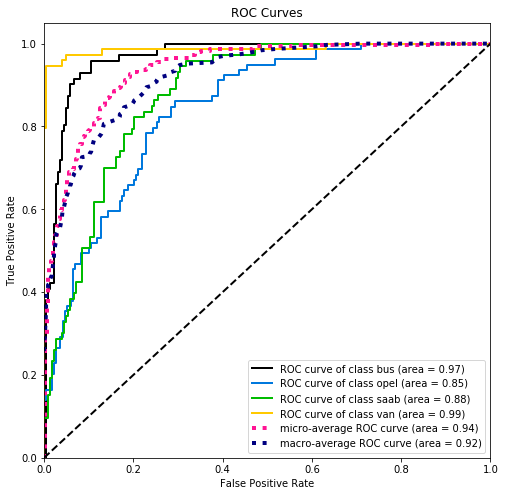

In [84]:
scikitplot.metrics.plot_roc(y_test, pca_clf.predict_proba(X_test), figsize=(8, 8))

*As seen from the plot above, classifiers ability to separate particular classes a little bit decreased but it was predictable.*

In [62]:
C = pca_clf.best_params_['lr__C']
C

100.0

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
param_distr = {
    'max_depth': np.linspace(5, 14, 10)
}
dt_clf = RandomizedSearchCV(DecisionTreeClassifier(),
                            param_distr,
                            scoring=['f1_weighted', 'accuracy'],
                            cv=5,
                            n_jobs=-1,
                            refit='accuracy')
dt_clf.fit(X_train, y_train)
pd.DataFrame(dt_clf.cv_results_)[['param_max_depth',
                               'mean_test_accuracy',
                               'rank_test_accuracy',
                               'mean_test_f1_weighted',
                               'rank_test_f1_weighted',
                              ]].sort_values('rank_test_accuracy')

,param_max_depth,mean_test_accuracy,rank_test_accuracy,mean_test_f1_weighted,rank_test_f1_weighted
3,8,0.686722,1,0.682246,1
1,6,0.686656,2,0.680185,2
6,11,0.679433,3,0.672837,5
7,12,0.677615,4,0.675001,4
9,14,0.677615,4,0.675060,3
2,7,0.677548,6,0.670799,6
0,5,0.675630,7,0.669457,7
4,9,0.672143,8,0.669207,8
8,13,0.668507,9,0.665367,9
5,10,0.666672,10,0.661790,10


In [97]:
MAX_DEPTH = dt_clf.best_params_['max_depth']
MAX_DEPTH

8.0

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of N algorithms varying N from 2 to 100 (with step 2).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


To build a __Bagging__ ensebmle you might generate 50 subsets of `train` data (of the same size as the original dataset) using bootstrap procedure. Then you train logistic regression/decision tree with optimal hyperparameters you estimated before on each subset. Finally, you average the models predictions.

*Hint: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [23]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score

In [68]:
dt = DecisionTreeClassifier(max_depth=MAX_DEPTH)
lr = Pipeline(
    steps = (
        ('scale', normalizer),
        ('pca', pca),
        ('logreg', LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=C))
    )
)

ensemble_size = np.arange(2, 100, 2)

In [79]:
lr_accuracy = np.zeros(ensemble_size.shape[0])
lr_f1 = np.zeros(ensemble_size.shape[0])
for i, N in enumerate(ensemble_size):
    lr_ensemble = BaggingClassifier(base_estimator=lr,
                                    n_estimators=N,
                                    max_samples=1.0,
                                    n_jobs=2,
                                    bootstrap=True).fit(X_train, y_train)
    lr_accuracy[i] = accuracy_score(y_test, lr_ensemble.predict(X_test))
    lr_f1[i] = f1_score(y_test, lr_ensemble.predict(X_test), average='weighted')

In [98]:
dt_accuracy = np.zeros(ensemble_size.shape[0])
dt_f1 = np.zeros(ensemble_size.shape[0])
for i, N in enumerate(ensemble_size):
    dt_ensemble = BaggingClassifier(base_estimator=dt,
                                    n_estimators=N,
                                    max_samples=1.0,
                                    n_jobs=2,
                                    bootstrap=True).fit(X_train, y_train)
    dt_accuracy[i] = accuracy_score(y_test, dt_ensemble.predict(X_test))
    dt_f1[i] = f1_score(y_test, dt_ensemble.predict(X_test), average='weighted')

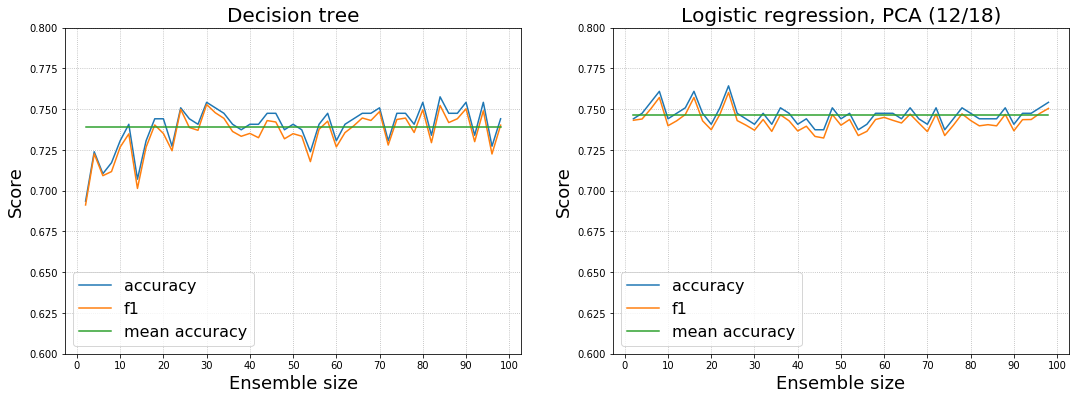

In [99]:
accuracy = [dt_accuracy, lr_accuracy]
f1 = [dt_f1, lr_f1]

plt.figure(figsize=(18, 6))
for i in range(0, 2):
    plt.subplot(1, 2, i + 1)
    plt.plot(ensemble_size, accuracy[i], label='accuracy')
    plt.plot(ensemble_size, f1[i], label='f1')
    plt.plot(ensemble_size, accuracy[i].mean() * np.ones(ensemble_size.shape[0]), label='mean accuracy')
    plt.title('Decision tree' if i == 0
              else 'Logistic regression, PCA (' + str(N_COMPONENTS) + '/18)', fontsize=20)
    plt.ylim((0.6, 0.8))
    plt.xlabel('Ensemble size', fontsize=18)
    plt.xticks(np.arange(0, 110, 10))
    plt.ylabel('Score', fontsize=18)
    plt.legend(fontsize=16)
    plt.grid(ls=':')
plt.show()

*Concerning Logistic Regression there was noticed no dependance of perfomance on size of ensemble, consequently, there is no matter if there are 10 or 90 classifiers working together or even the only one (enlarging ensemble size only provides better stability of final classifier).*<br>
*Speaking about Decision Tree, there was noticed an increase in scoring when moving from 1-2 classifiers up to 6-8, but futher expanding of ensemble size didn't give even more increase but made predictions more stable.*<br>
*So, optimal number of alghorithms is 1 in case of Logistic Regression and 10-12 in case of Decision Tree.*

*Actually, I don't have many thoughts concerning optimality of hyperparameters that were found earlier. I can only note that changing them didn't cause any significant increase of precision, so I guess them already been optimal.*

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf_accuracy = np.zeros(ensemble_size.shape[0])
rf_f1 = np.zeros(ensemble_size.shape[0])
for i, N in enumerate(ensemble_size):
    rf = RandomForestClassifier(n_estimators=N,
                                max_depth=MAX_DEPTH,
                                bootstrap=True,
                                n_jobs=2).fit(X_train, y_train)
    rf_accuracy[i] = accuracy_score(y_test, rf.predict(X_test))
    rf_f1[i] = f1_score(y_test, rf.predict(X_test), average='weighted')

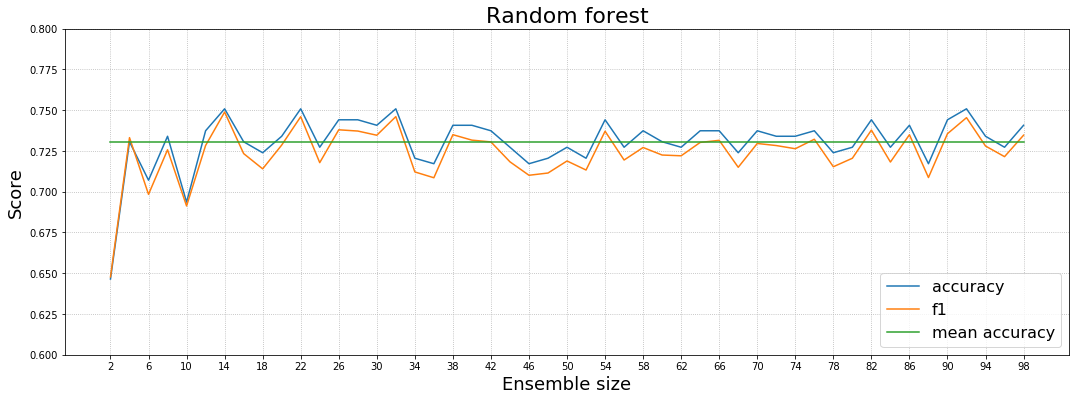

In [74]:
plt.figure(figsize=(18, 6))
plt.plot(ensemble_size, rf_accuracy, label='accuracy')
plt.plot(ensemble_size, rf_f1, label='f1')
plt.plot(ensemble_size, rf_accuracy.mean() * np.ones(ensemble_size.shape[0]), label='mean accuracy')
plt.xticks(np.arange(2, 100, 4))
plt.ylim((0.6, 0.8))
plt.title('Random forest', fontsize=22)
plt.xlabel('Ensemble size', fontsize=18)
plt.ylabel('Score', fontsize=18)
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

*Random Forest conclusions are pretty similar to ones in Decision Tree part.*<br>
*Scoring metrics appear to increase gradually while expanding ensemble up to 18-22 algorithms but futher expansion gives almost zero effect.*

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [88]:
X_train_splited = np.split(X_train, np.arange(1, 10, 1) * X_train.shape[0] // 10)
y_train_splited = np.split(y_train, np.arange(1, 10, 1) * y_train.shape[0] // 10)
parts_number = np.arange(1, 11, 1)

In [76]:
accuracy_lr = np.zeros(len(parts_number))
f1_lr = np.zeros(len(parts_number))
accuracy_dt = np.zeros(len(parts_number))
f1_dt = np.zeros(len(parts_number))
accuracy_rf = np.zeros(len(parts_number))
f1_rf = np.zeros(len(parts_number))

for i in parts_number:
    lr.fit(np.vstack(X_train_splited[0:i]), np.hstack(y_train_splited[0:i]))
    dt.fit(np.vstack(X_train_splited[0:i]), np.hstack(y_train_splited[0:i]))
    rf.fit(np.vstack(X_train_splited[0:i]), np.hstack(y_train_splited[0:i]))
    
    accuracy_lr[i - 1] = accuracy_score(y_test, lr.predict(X_test))
    f1_lr[i - 1] = f1_score(y_test, lr.predict(X_test), average='weighted')
    accuracy_dt[i - 1] = accuracy_score(y_test, dt.predict(X_test))
    f1_dt[i - 1] = f1_score(y_test, dt.predict(X_test), average='weighted')
    accuracy_rf[i - 1] = accuracy_score(y_test, rf.predict(X_test))
    f1_rf[i - 1] = f1_score(y_test, rf.predict(X_test), average='weighted')
    
lr_metrics = [accuracy_lr, f1_lr]
dt_metrics = [accuracy_dt, f1_dt]
rf_metrics = [accuracy_rf, f1_rf]

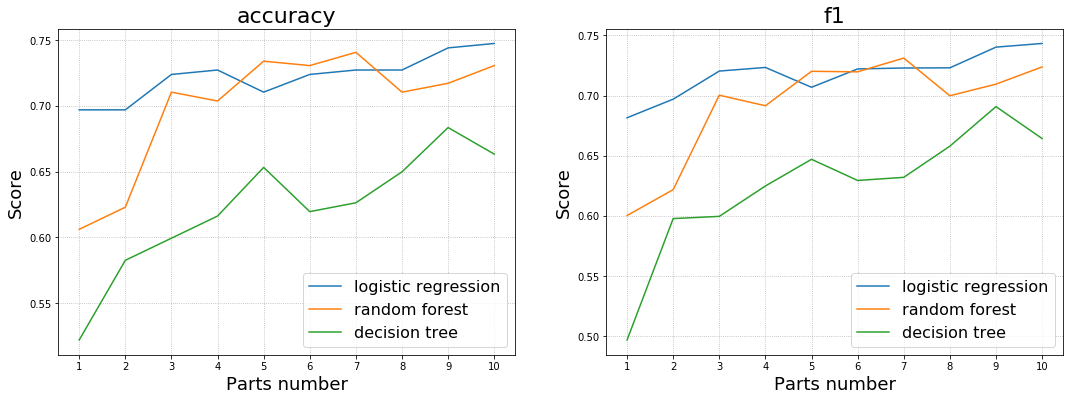

In [77]:
plt.figure(figsize=(18, 6))
for i in range(0, 2):
    plt.subplot(1, 2, i + 1)
    plt.plot(parts_number, lr_metrics[i], label='logistic regression')
    plt.plot(parts_number, rf_metrics[i], label='random forest')
    plt.plot(parts_number, dt_metrics[i], label='decision tree')
    plt.title('accuracy' if i == 0 else 'f1', fontsize=22)
    plt.xlabel('Parts number', fontsize=18)
    plt.ylabel('Score', fontsize=18)
    plt.xticks(parts_number)
    plt.legend(fontsize=16)
    plt.grid(ls=':')
plt.show()

*Scoring metrics seem to follow increasing trends with training dataset expansion. These tendecies are especially noticable in the beginning and tend to slightly slow down during futher increase of training dataset size.*<br>
*It is pretty obviuos that classifier performs better on bigger train dataset.*